In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.special import kn, kv
from matplotlib import rc
from scipy.constants import hbar, epsilon_0, e, k, m_e
from scipy.constants import physical_constants
import matplotlib.pyplot as plt
#import scienceplots

In [2]:
# Value for the T that is in the integration
def T_n(V, b, coef):
    return coef*b/V

In [3]:
# Experimental constants
T_A_val = 0.5 # Acceleration time in seconds
T_E_val = 1 # Free-fall time in seconds
dX_val = 20e-6 # Superposition size in meters
W_min = 2*np.pi/(4*T_A_val+T_E_val) # Minimum frequency in integral

# Charged interferometer

In [4]:
# projection angles:
beta = 0
alpha = 0
# Experimental parameters variables
n_values = np.array([1, 10, 100]) # Number of particles values list

# Charge-Charge

Velocity as variable

In [5]:
# Charge-charge decoherence function
def gamma_cc(w, t_a, t_e, b, v):
    int_cc = w**(-4) * (np.sin(w*t_a/2))**4 * (np.sin((w/2)*(2*t_a+t_e)))**2 * ((np.cos(alpha)*kn(1, w*b/v))**2 + (np.cos(beta)*kn(0, w*b/v))**2)
    return int_cc

# Constant for decoherence eqn.
def constant_cc(n, v, b, dX, t_a, T_noise):
    c1 = (n*e)**2*e**2*dX**2
    c2 = np.pi**3*hbar**2*epsilon_0**2*v**4*t_a**4*T_noise
    return c1/c2

# Reset
integral_values = [[],[],[]]
integral_error = [[],[],[]]
constants_values = [[],[],[]]

# Specific values for this setup
# v_values = np.logspace(-1.7, -0.5, 10)
# B_val = 1
v_values = np.logspace(-6, -4.9, 300)
B_val = 1e-4

# loop over different number of charges:
for j in np.array([0,1,2]):
    # loop over different velocities:
    for i in v_values:
        T_noise_val = T_n(i, B_val, 1) # find the value of T_n
        n_j = n_values[j] # define the number of remnant charges on the crystal
        res, err = quad(gamma_cc, W_min, np.inf, args=(T_A_val, T_E_val, B_val, i)) # numerical integration
        integral_values[j].append(res)
        integral_error[j].append(err)
        constants_values[j].append(constant_cc(n_j, i, B_val, dX_val, T_A_val, T_noise_val)) # constant values
        # print some results to get an idea, number of points printed managed by last number in v_values above loop:
#         print(i)
#         print(res)
#         print(err)
#         print(constants_values[j])

gamma_cc = np.array(integral_values)*np.array(constants_values)
# print(gamma_cc)

### Plot
As a function of velocity (have to redefine loops above to get this plot)

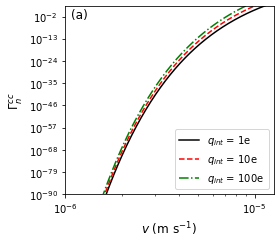

In [7]:
#plt.style.use(['science', 'ieee'])
plt.figure(figsize=(4.0,3.5))
plt.plot(v_values, gamma_cc[0], 'k-', label=(r'$q_{int}$' f' = {n_values[0]}e'))
plt.plot(v_values, gamma_cc[1], 'r--', label=(r'$q_{int}$' f' = {n_values[1]}e'))
plt.plot(v_values, gamma_cc[2],  'g-.', label=(r'$q_{int}$' f' = {n_values[2]}e'))

plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel(r'$\Gamma_{n}^{cc}$',fontsize=12)
plt.xlim(v_values[0], v_values[len(v_values)-1])
plt.ylim(bottom=1e-90, top=1e3)
plt.legend(loc='lower right')
plt.xlabel(r'$v$ (m s$^{-1}$)',fontsize=12)
plt.text(10**(-5.97), 1e-3, '(a)', fontsize=12)
#plt.title('(a)')
plt.tight_layout()
#plt.savefig('noise-cc-v-2.png', dpi=800)

In [9]:
print(max(gamma_cc[0]),max(gamma_cc[1]),max(gamma_cc[2]))

0.00012312071950724358 0.01231207195072436 1.231207195072436


In [11]:
print(max(gamma_cc[0]),max(gamma_cc[1]),max(gamma_cc[2]))

0.0012312071950724359 0.12312071950724361 12.31207195072436


One order of mangitude increase (as expected since b/v~10^(1/2) so (b/v)^2 ~ 10)

# Charge-Dipole

Temperature as variable

#### Additional constants

In [10]:
# Experimental constants permanent external dipole
D_water_val = 6.17*10**(-30) # permanent dipole moment of water

# Experimental constants induced external dipole
polar_atom_val = 1.710*4*np.pi*epsilon_0*1e-24*1e-6
#polar_atom_val = 1.710*1e-30 #4*np.pi*epsilon_0*1.710 # polarisability (N2)
#polar_atom_val = 1.710*1e-6*4*np.pi*epsilon_0

In [11]:
polar_atom_val*2*e/(4*np.pi*epsilon_0)

5.479444088279998e-49

## Permanent external dipole

In [76]:
# Permanent external dipole
def gamma_cd_per(w, t_a, t_e, b, v):
    f_W = w**(-6) * (np.sin(w*t_a/2))**4 * (np.sin((w/2)*(2*t_a+t_e)))**2
    psd = w**3 * ( (np.cos(alpha)*kv(1.5, (w*b)/v))**2 + (np.cos(beta)*kv(0.5, (w*b)/v))**2 )
    return psd*f_W

def constant_cd_per(b, v, t_a, dip, dx, T_noise, n):
    c1 = (n*e)**2*dip**2*dx**2
    c2 = 2*np.pi**2*hbar**2*epsilon_0**2*v**5*b*t_a**4*T_noise
    return c1/c2

# Specific for this setup
# v_values = np.logspace(-2, -1.5, 200) # Temperature values list
# B_val = 0.1 # impact parameter
v_values = np.logspace(-6, -4.9, 300)
B_val = 1e-4

# Reset
integral_values = [[],[],[]]
integral_error = [[],[],[]]
constants_values = [[],[],[]]

for j in np.array([0,1,2]):
    for i in v_values:
        T_noise_val = T_n(i, B_val, 1)
        n_j = n_values[j]
        res, err = quad(gamma_cd_per, W_min, np.inf, args=(T_A_val, T_E_val, B_val, i))
        integral_values[j].append(res)
        integral_error[j].append(err)
        constants_values[j].append(constant_cd_per(B_val, i, T_A_val, D_water_val, dX_val, T_noise_val, n_j))

gamma_cd_per = np.array(integral_values)*np.array(constants_values)

In [75]:
max(gamma_cd_per[2])

252.04631991593965

#### Plot

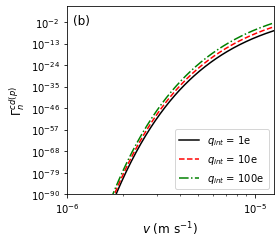

In [81]:
#plt.style.use(['science', 'ieee'])
plt.figure(figsize=(4.0,3.5))
plt.plot(v_values, gamma_cd_per[0], 'k-', label=(r'$q_{int}$' f' = {n_values[0]}e'))
plt.plot(v_values, gamma_cd_per[1], 'r--', label=(r'$q_{int}$' f' = {n_values[1]}e'))
plt.plot(v_values, gamma_cd_per[2],  'g-.', label=(r'$q_{int}$' f' = {n_values[2]}e'))
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel(r'$\Gamma_{n}^{cd(p)}$',fontsize=12)
plt.xlim(v_values[0], v_values[len(v_values)-1])
#plt.ylim(gamma_cd_per[0][0], gamma_cd_per[2][len(v_values)-1])
plt.ylim(bottom = 1e-90)
plt.legend(loc='lower right')
plt.xlabel(r'$v$ (m s$^{-1}$)',fontsize=12)
plt.text(10**(-5.97), 1e-3, '(b)', fontsize=12)
plt.tight_layout()
#plt.savefig('noise-cd-per-v-2.png', dpi=800)

## Induced external dipole

In [99]:
# Induced external dipole
def gamma_cd_ind(w, t_a, t_e, b, v):
    int_cd_ind = w**(-1) * (np.sin(w*t_a/2))**4 * (np.sin((w/2)*(2*t_a+t_e)))**2 * ( (np.cos(alpha) * kv(5/2, (w*b)/v))**2 + (np.cos(beta) * kv(3/2, (w*b)/v))**2 )
    return int_cd_ind

def constant_cd_ind(b, v, t_a, polar, dx, T_avg, n):
    c1 = (n*e)**4 * dx**2 * polar**2
    c2 = 512 * np.pi**4 * hbar**2 * epsilon_0**4 * v**7 * b**3 * t_a**4 * T_avg
    return c1/c2

# Specific for this setup
# v_values = np.logspace(-2, -1.4, 200) # Temperature values list
# B_val = 0.1 # impact parameter
v_values = np.logspace(-6, -4.9, 300)
B_val = 3*10**(-5)

# Reset
integral_values = [[],[],[]]
integral_error = [[],[],[]]
constants_values = [[],[],[]]

for j in np.array([0,1,2]):
    for i in v_values:
        T_noise_val = T_n(i, B_val, 1)
        n_j = n_values[j]
        res1, err1 = quad(gamma_cd_ind, W_min, np.inf, args=(T_A_val, T_E_val, B_val, i))
        integral_values[j].append(res1)
        integral_error[j].append(err1)
        constants_values[j].append(constant_cd_ind(B_val, i, T_A_val, polar_atom_val, dX_val, T_noise_val, n_j))

gamma_cd_ind = np.array(integral_values)*np.array(constants_values)
#print(constant_cd_ind(1, 1, T_A_val, polar_atom_val, dX_val, 1, 1))

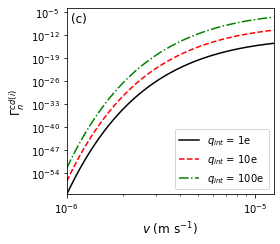

In [106]:
#plt.style.use(['science', 'ieee'])
plt.figure(figsize=(4.0,3.5))
plt.plot(v_values, gamma_cd_ind[0], 'k-', label=(r'$q_{int}$' f' = {n_values[0]}e'))
plt.plot(v_values, gamma_cd_ind[1], 'r--', label=(r'$q_{int}$' f' = {n_values[1]}e'))
plt.plot(v_values, gamma_cd_ind[2],  'g-.', label=(r'$q_{int}$' f' = {n_values[2]}e'))

plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\Gamma_{n}^{cd(i)}$', fontsize=12)
plt.xlim(v_values[0], v_values[len(v_values)-1])
plt.ylim(bottom=gamma_cd_ind[0][0])#, gamma_cd_ind[2][len(v_values)-1]
plt.legend(loc='lower right')
plt.xlabel(r'$v$ (m s$^{-1}$)',fontsize=12)
plt.text(10**(-5.98), 10**(-8), '(c)', fontsize=12)
plt.tight_layout()
#plt.savefig('noise-cd-ind-v-2.png', dpi=800)

In [107]:
print(gamma_cd_ind[2][len(v_values)-1])

3699608797.5302987


In [107]:
print(max(gamma_cc[0]))
print(max(gamma_cd_per[0]))
print(max(gamma_cd_ind[0]))

72526.27125904096
3.0146928747242555e-07
3.291237743070534e-15


# All charged interactions

In [123]:
# additional values:
# vel = 0.03
# B_val_list = np.logspace(-1, 1, 300)
vel = 1e-6
B_val_list = np.logspace(-5, -3.9, 300)

In [124]:
# Charge-charge
def gamma_cc(w, t_a, t_e, b, v):
    int_cc = w**(-4) * (np.sin(w*t_a/2))**4 * (np.sin((w/2)*(2*t_a+t_e)))**2 * ((np.cos(alpha)*kn(1, w*b/v))**2 + (np.cos(beta)*kn(0, w*b/v))**2)
    return int_cc

def constant_cc(n, v, b, dX, t_a, T_n):
    c1 = (n*e)**2*e**2*dX**2
    c2 = np.pi**3*hbar**2*epsilon_0**2*v**4*t_a**4*T_n
    return c1/c2

# Reset
integral_values = []
constants_values = []

for i in B_val_list:
    T_noise_val = T_n(vel, i, 1)
    n_value = n_values[0]
    res, err = quad(gamma_cc, W_min, np.inf, args=(T_A_val, T_E_val, i, vel))
    integral_values.append(res)
    constants_values.append(constant_cc(n_value, vel, i, dX_val, T_A_val, T_noise_val))

gamma_cc = np.array(integral_values)*np.array(constants_values)

In [125]:
# Permanent external dipole
def gamma_cd_per(w, t_a, t_e, b, v):
    f_W = w**(-6) * (np.sin(w*t_a/2))**4 * (np.sin((w/2)*(2*t_a+t_e)))**2
    psd = w**3 * ( (np.cos(alpha)*kv(1.5, (w*b)/v))**2 + (np.cos(beta)*kv(0.5, (w*b)/v))**2 )
    return psd*f_W

def constant_cd_per(b, v, t_a, dip, dx, T_n, n):
    c1 = (n*e)**2*dip**2*dx**2
    c2 = 2*np.pi**2*hbar**2*epsilon_0**2*v**5*b*t_a**4*T_n
    return c1/c2

# Reset
integral_values = []
constants_values = []

for i in B_val_list:
    T_noise_val = T_n(vel, i, 1)
    n_value = n_values[0]
    res, err = quad(gamma_cd_per, W_min, np.inf, args=(T_A_val, T_E_val, i, vel))
    integral_values.append(res)
    constants_values.append(constant_cd_per(i, vel, T_A_val, D_water_val, dX_val, T_noise_val, n_value))

gamma_cd_per = np.array(integral_values)*np.array(constants_values)

In [126]:
# Induced external dipole
def gamma_cd_ind(w, t_a, t_e, b, v):
    int_cd_ind = w**(-1) * (np.sin(w*t_a/2))**4 * (np.sin((w/2)*(2*t_a+t_e)))**2 * ( (np.cos(alpha) * kv(5/2, (w*b)/v))**2 + (np.cos(beta) * kv(3/2, (w*b)/v))**2 )
    return int_cd_ind

def constant_cd_ind(b, v, t_a, polar, dx, T_n, n):
    c1 = (n*e)**4 * dx**2 * polar**2
    c2 = 512 * np.pi**4 * hbar**2 * epsilon_0**4 * v**7 * b**3 * t_a**4 * T_n
    return c1/c2

# Reset
integral_values = []
constants_values = []

for i in B_val_list:
    T_noise_val = T_n(vel, i, 1)
    n_value = n_values[0]
    res, err = quad(gamma_cd_ind, W_min, np.inf, args=(T_A_val, T_E_val, i, vel))
    integral_values.append(res)
    constants_values.append(constant_cd_ind(i, vel, T_A_val, polar_atom_val, dX_val, T_noise_val, n_value))

gamma_cd_ind = np.array(integral_values)*np.array(constants_values)

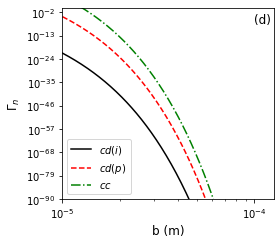

In [137]:
plt.figure(figsize=(4.0,3.5))
plt.plot(B_val_list, gamma_cd_ind, 'k-', label=(r'$cd(i)$') )
plt.plot(B_val_list, gamma_cd_per, 'r--', label=(r'$cd(p)$') )
plt.plot(B_val_list, gamma_cc,  'g-.', label=(r'$cc$') )
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel(r'$\Gamma_{n}$', fontsize=12)
plt.xlim(B_val_list[0], B_val_list[len(B_val_list)-1])
plt.ylim(bottom=1e-90,top=1)
plt.legend(loc='lower left')
plt.xlabel(r'b (m)',fontsize=12)
plt.text(10**(-4), 1e-7, '(d)', fontsize=12)
plt.tight_layout()
plt.savefig('noise-charged-b-2.png', dpi=800)

# Neutral interferometer

#### Additional constants

In [4]:
d_int_val = e*1e-7 # interferometer dipole value
eps_val = 5.7 # for diamond

R_list = np.array([1, 0.1, 0.01]) # for microsphere - 10 nm
bv_values = np.array([1,2,10])

D_water_val = 6.17*10**(-30) # permanent dipole moment of water

## Permanent interferometer dipole

In [38]:
# Permanent interferometer dipole
def gamma_dc_per(w, t_a, t_e, b, v):
    f_W = w**(-6) * (np.sin(w*t_a/2))**4 * (np.sin((w/2)*(2*t_a+t_e)))**2
    int_dc_per = w**(-2) * f_W * ( (kv(2, (w*b)/v))**2 + (2 + (w**2*b**2)/v**2)*(kv(1, (w*b)/v))**2 + (kv(0, (w*b)/v))**2 - 2*(w*b/v) * kv(0, (w*b)/v) * kv(1, (w*b)/v) )
    return int_dc_per

def constant_dc_per(b, v, t_a, dip, dx, T_n):
    c1 = e**2*dip**2*dx**2
    c2 = 9*np.pi**3*hbar**2*epsilon_0**2*v**6*t_a**4*T_n
    return c1/c2

# Specific for this setup
# v_values = np.logspace(-1, -0.5, 300) # Temperature values list
# B_val = 1 # impact parameter
v_values = np.logspace(-6, -4.9, 300)
B_val = 1e-4

# reset
integral_values = [[],[],[]]
integral_error = [[],[],[]]
constants_values = [[],[],[]]

for j in np.array([0,1,2]):
    for i in v_values:
        T_noise_val = T_n(i, B_val, bv_values[j])
        res, err = quad(gamma_dc_per, W_min, np.inf, args=(T_A_val, T_E_val, B_val, i))
        integral_values[j].append(res)
        integral_error[j].append(err)
        constants_values[j].append(constant_dc_per(B_val, i, T_A_val, d_int_val, dX_val, T_noise_val))

gamma_dc_per = np.array(integral_values)*np.array(constants_values)

#### Plot

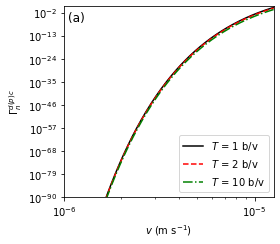

In [40]:
#plt.style.use(['science', 'ieee'])
plt.figure(figsize=(4.0,3.5))
plt.plot(v_values, gamma_dc_per[0], 'k-', label=(r'$T$' f' = {bv_values[0]} b/v'))
plt.plot(v_values, gamma_dc_per[1], 'r--', label=(r'$T$' f' = {bv_values[1]} b/v'))
plt.plot(v_values, gamma_dc_per[2],  'g-.', label=(r'$T$' f' = {bv_values[2]} b/v'))
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel(r'$\Gamma_{n}^{d(p)c}$')
plt.xlim(v_values[0], v_values[len(v_values)-1])
plt.ylim(bottom=1e-90,top = 1e1)
plt.legend(loc='lower right')
plt.xlabel(r'$v$ (m s$^{-1}$)')
plt.text(10**(-5.98), 10**(-6), '(a)', fontsize=12)
plt.tight_layout()
#plt.savefig('noise-dc-per-v-2.png', dpi=800)

## Induced interferometer dipole

In [36]:
# Induced interferometer dipole
def gamma_dc_ind(w, t_a, t_e, b, v):
    int_cd_ind = w**(-1) * (np.sin(w*t_a/2))**4 * (np.sin((w/2)*(2*t_a+t_e)))**2 * ( (np.cos(alpha) * kv(5/2, (w*b)/v))**2 + (np.cos(beta) * kv(3/2, (w*b)/v))**2 )
    return int_cd_ind

def constant_dc_ind(b, v, t_a, eps, R, dx, T_avg):
    c1 = ((eps-1)/(eps+2))**2 * e**4 * R**6 * dx**2
    c2 = 32 * np.pi**2 * hbar**2 * epsilon_0**2 * v**7 * b**3 * t_a**4 * T_avg
    return c1/c2

# Specific for this setup
alpha = 0
beta = 0
# v_values = np.logspace(-2.5, -1.5, 200) # Temperature values list
# B_val = 0.1 # impact parameter
v_values = np.logspace(-6, -4.9, 300)
B_val = 1e-4

# reset
integral_values = [[],[],[]]
integral_error = [[],[],[]]
constants_values = [[],[],[]]

for j in np.array([0,1,2]):
    for i in v_values:
        T_noise_val = T_n(i, B_val, 1)
        R_val = R_list[j]*1e-6
        res, err = quad(gamma_dc_ind, W_min, np.inf, args=(T_A_val, T_E_val, B_val, i))
        integral_values[j].append(res)
        integral_error[j].append(err)
        constants_values[j].append(constant_dc_ind(B_val, i, T_A_val, eps_val, R_val, dX_val, T_noise_val))

gamma_dc_ind = np.array(integral_values)*np.array(constants_values)

#### Plot: different R

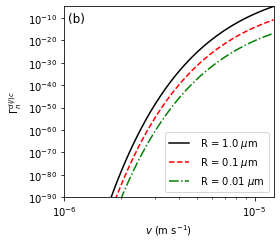

In [43]:
plt.figure(figsize=(4.0,3.5))
plt.plot(v_values, gamma_dc_ind[0], 'k-', label=(f' R = {R_list[0]}' r' $\mu$m'))
plt.plot(v_values, gamma_dc_ind[1], 'r--', label=(f' R = {R_list[1]}' r' $\mu$m'))
plt.plot(v_values, gamma_dc_ind[2],  'g-.', label=(f' R = {R_list[2]}' r' $\mu$m'))
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\Gamma_{n}^{d(i)c}$')
plt.xlim(v_values[0], v_values[len(v_values)-1])
plt.ylim(bottom=1e-90,top=max(gamma_dc_ind[0]))
plt.legend(loc='lower right')
plt.xlabel(r'$v$ (m s$^{-1}$)')
plt.text(10**(-5.98), 10**(-12), '(b)', fontsize=12)
plt.tight_layout()
#plt.savefig('noise-dc-ind-v-2.png', dpi=800)

## Dipole - dipole

In [5]:
# Dipole-dipole
def gamma_dd(w, t_a, t_e, b, v):
    int_dd = w**(-2) * (np.sin(w*t_a/2))**4 * (np.sin((w/2)*(2*t_a+t_e)))**2 * ( (np.cos(alpha) * kv(2, (w*b)/v))**2 + (np.cos(beta) * kv(1, (w*b)/v))**2 )
    return int_dd

def constant_dd(dip1, dip2, b, v, t_a, dx, T_n):
    c1 = 4* dip1**2 * dip2**2 * dx**2 * np.cos(theta0)**2
    c2 = np.pi**3 * hbar**2 * epsilon_0**2 * v**6 * b**2 * t_a**4 * T_n
    return c1/c2

# Specific for this setup
alpha = np.pi/4
beta = 0#np.pi/4
theta0 = np.pi/4

#v_values = np.logspace(-2.5, -1.5, 200) # Temperature values list
#b_val_list = np.array([0.1, 1,10]) # impact parameter
v_values = np.logspace(-6, -4.9, 300)
b_val_list = np.array([100,30,1000])

# reset
integral_values = [[],[],[]]
integral_error = [[],[],[]]
constants_values = [[],[],[]]

for j in np.array([0,1,2]):
    for i in v_values:
        B_value = b_val_list[j]*1e-6
        T_noise_val = T_n(i, B_value, 1)
        res, err = quad(gamma_dd, W_min, np.inf, args=(T_A_val, T_E_val, B_value, i))
        integral_values[j].append(res)
        integral_error[j].append(err)
        constants_values[j].append(constant_dd(d_int_val, D_water_val, B_value, i, T_A_val, dX_val, T_noise_val))

gamma_dd = np.array(integral_values)*np.array(constants_values)

#### Plot

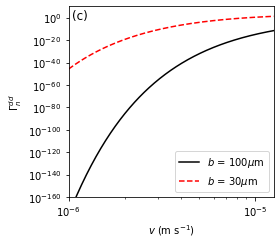

In [22]:
plt.figure(figsize=(4.0,3.5))
plt.plot(v_values, gamma_dd[0], 'k-', label=(r'$b$' f' = {b_val_list[0]}' r'$\mu$m'))
plt.plot(v_values, gamma_dd[1], 'r--', label=(r'$b$' f' = {b_val_list[1]}' r'$\mu$m'))
#plt.plot(v_values, gamma_dd[2],  'g-.', label=(r'$b$' f' = {b_val_list[2]}m'))
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\Gamma_{n}^{dd}$')
plt.xlim(v_values[0], v_values[len(v_values)-1])
plt.ylim(bottom=10**(-160))
plt.legend(loc='lower right')
plt.xlabel(r'$v$ (m s$^{-1}$)')
plt.text(10**(-5.98), 10**(-1), '(c)', fontsize=12)
plt.tight_layout()
#plt.savefig('noise-dd-v-2.png', dpi=800)

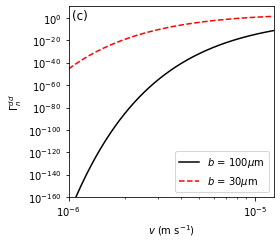

In [6]:
plt.figure(figsize=(4.0,3.5))
plt.plot(v_values, gamma_dd[0], 'k-', label=(r'$b$' f' = {b_val_list[0]}' r'$\mu$m'))
plt.plot(v_values, gamma_dd[1], 'r--', label=(r'$b$' f' = {b_val_list[1]}' r'$\mu$m'))
#plt.plot(v_values, gamma_dd[2],  'g-.', label=(r'$b$' f' = {b_val_list[2]}m'))
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\Gamma_{n}^{dd}$')
plt.xlim(v_values[0], v_values[len(v_values)-1])
plt.ylim(bottom=10**(-160))
plt.legend(loc='lower right')
plt.xlabel(r'$v$ (m s$^{-1}$)')
plt.text(10**(-5.98), 10**(-1), '(c)', fontsize=12)
plt.tight_layout()
#plt.savefig('noise-dd-v-2.png', dpi=800)

In [45]:
max(gamma_dd[0])

86.42291136816935

In [57]:
max(gamma_dd[0])

1.1847486494428167e-28

## All neutral interactions

In [28]:
delta_x_vals = np.logspace(-9,-5,300)
#np.arange(1,20,0.01) # in micron
# vel = 0.03 # temperature
# B_val = 0.1 # impact parameter
vel = 1e-5 # temperature
B_val = 1e-4 # impact parameter
T_noise_val = T_n(vel, B_val, 1)
R_val = 0.5*1e-6

In [29]:
# Permanent interferometer dipole
def gamma_dc_per(w, t_a, t_e, b, v):
    f_W = w**(-6) * (np.sin(w*t_a/2))**4 * (np.sin((w/2)*(2*t_a+t_e)))**2
    int_dc_per = w**(-2) * f_W * ( (kv(2, (w*b)/v))**2 + (2 + (w**2*b**2)/v**2)*(kv(1, (w*b)/v))**2 + (kv(0, (w*b)/v))**2 - 2*(w*b/v) * kv(0, (w*b)/v) * kv(1, (w*b)/v) )
    return int_dc_per

def constant_dc_per(b, v, t_a, dip, dx, T_avg):
    c1 = e**2*dip**2*dx**2
    c2 = 9*np.pi**3*hbar**2*epsilon_0**2*v**6*t_a**4*T_avg
    return c1/c2

# Reset
integral_values = []
constants_values = []

for i in delta_x_vals:
    del_x = i#*1e-6
    res, err = quad(gamma_dc_per, W_min, np.inf, args=(T_A_val, T_E_val, B_val, vel))
    integral_values.append(res)
    constants_values.append(constant_dc_per(B_val, vel, T_A_val, d_int_val, del_x, T_noise_val))

gamma_dc_per = np.array(integral_values)*np.array(constants_values)

In [30]:
# Induced interferometer dipole
def gamma_dc_ind(w, t_a, t_e, b, v):
    int_cd_ind = w**(-1) * (np.sin(w*t_a/2))**4 * (np.sin((w/2)*(2*t_a+t_e)))**2 * ( (np.cos(alpha) * kv(5/2, (w*b)/v))**2 + (np.cos(beta) * kv(3/2, (w*b)/v))**2 )
    return int_cd_ind

def constant_dc_ind(b, v, t_a, eps, R, dx, T_avg):
    c1 = ((eps-1)/(eps+2))**2 * e**4 * R**6 * dx**2
    c2 = 32 * np.pi**2 * hbar**2 * epsilon_0**2 * v**7 * b**3 * t_a**4 * T_avg
    return c1/c2

# Reset
integral_values = []
constants_values = []

# For this setup specific
alpha = 0
beta = 0

for i in delta_x_vals:
    del_x = i#*1e-6
    res, err = quad(gamma_dc_ind, W_min, np.inf, args=(T_A_val, T_E_val, B_val, vel))
    integral_values.append(res)
    constants_values.append(constant_dc_ind(B_val, vel, T_A_val, eps_val, R_val, del_x, T_noise_val))

gamma_dc_ind = np.array(integral_values)*np.array(constants_values)

In [31]:
# Dipole-dipole
def gamma_dd(w, t_a, t_e, b, v):
    int_dd = w**(-2) * (np.sin(w*t_a/2))**4 * (np.sin((w/2)*(2*t_a+t_e)))**2 * ( (np.cos(alpha) * kv(2, (w*b)/v))**2 + (np.cos(beta) * kv(1, (w*b)/v))**2 )
    return int_dd

def constant_dd(dip1, dip2, b, v, t_a, dx, T_avg):
    c1 = 4* dip1**2 * dip2**2 * dx**2 * np.cos(theta0)**2
    c2 = np.pi**3 * hbar**2 * epsilon_0**2 * v**6 * b**2 * t_a**4 * T_avg
    return c1/c2

# Reset
integral_values = []
constants_values = []

# For this setup specific
alpha = np.pi/4
beta = np.pi/4
theta0 = np.pi/4

for i in delta_x_vals:
    del_x = i#*1e-6
    res, err = quad(gamma_dd, W_min, np.inf, args=(T_A_val, T_E_val, B_val, vel))
    integral_values.append(res)
    constants_values.append(constant_dd(d_int_val, D_water_val, B_val, vel, T_A_val, del_x, T_noise_val))

gamma_dd = np.array(integral_values)*np.array(constants_values)

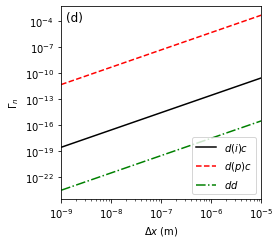

In [36]:
plt.figure(figsize=(4.0,3.5))
plt.plot(delta_x_vals, gamma_dc_ind, 'k-', label=(r'$d(i)c$') )
plt.plot(delta_x_vals, gamma_dc_per, 'r--', label=(r'$d(p)c$') )
plt.plot(delta_x_vals, gamma_dd,  'g-.', label=(r'$dd$') )
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel(r'$\Gamma_{n}$')
plt.xlim(delta_x_vals[0], delta_x_vals[len(delta_x_vals)-1])
plt.legend(loc='lower right')
plt.xlabel(r'$\Delta x$ (m)')
plt.text(10**(-8.9), 10**(-4), '(d)', fontsize=12)
plt.tight_layout()
#plt.savefig('noise-neutral-delx-2.png', dpi=800)

In [61]:
max(gamma_dc_per)

0.02809037824747102

In [44]:
max(gamma_cc)

1557888559.018148